**The file we are using contains a collection of more than 5 thousand SMS phone messages classified as 'ham' or 'spam'.
Using these labeled ham and spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.**

**Import NLTK and download the corpus for 'stopwords'.**

In [1]:
import nltk 


In [2]:
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Anita
[nltk_data]     George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Get the Data

In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


**Print the first ten messages and number them using enumerate.**

In [5]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

# Import Pandas Library

In [6]:
import pandas as pd

**Read in the TSV file into a CSV file.**

In [7]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

**Use 'describe' to get some statistics**

In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Use 'groupby' to use describe by label**

In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

**Detect the length of the text message.**

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

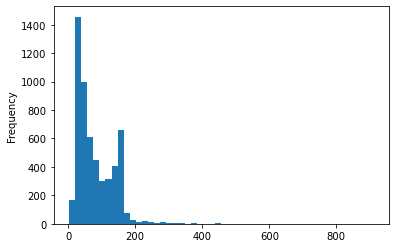

In [12]:
messages['length'].plot(bins=50, kind='hist') 

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [15]:
messages[messages['length'] == 2]['message'].iloc[0]

'Ok'

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

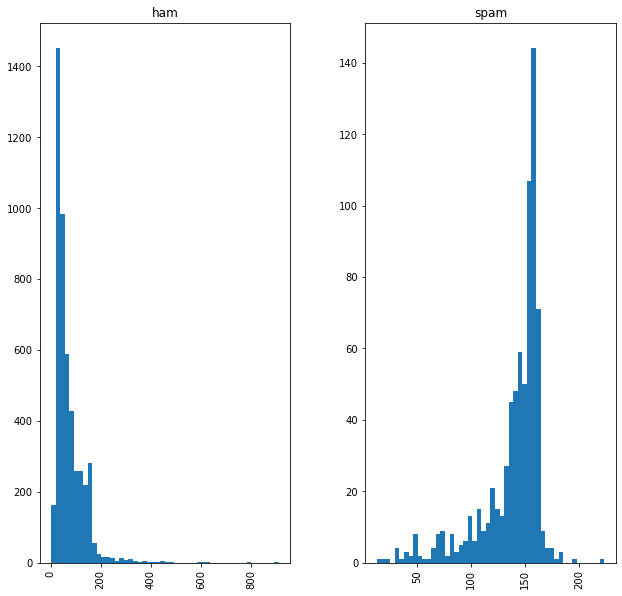

In [16]:
messages.hist(column='length', by='label', bins=50,figsize=(10,10))

# Text Pre-processing

In [17]:
import string

In [18]:
from nltk.corpus import stopwords

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


**Use .transform on Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.**

In [22]:
messages_bow = bow_transformer.transform(messages['message'])

In [23]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [24]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


# Term Frequency-Inverse Document Frequency

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

**Transform the entire bag-of-words corpus into TF-IDF corpus.**

In [30]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


# Training a model using Naive Bayes classifier algorithm

In [31]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

# Model Evaluation

**Determine how well the model will do overall on the entire dataset. Get all the predictions**

In [32]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


**Classification Report**

In [33]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



# Train Test Split

**A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. The final evaluation on test data is representative of true predictive performance.**

In [35]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


**The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). The default split would have been 30/70.**

# Creating a Data Pipeline

**Use SciKit Learn's pipeline capabilities to store a pipeline of workflow.**

In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

**Directly pass message text data and the pipeline will do all the pre-processing. It can be treated as a model/estimator API.**

In [37]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D8D89734C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [38]:
predictions = pipeline.predict(msg_test)

In [39]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1007
        spam       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



# Use Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [42]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D8D89734C0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [43]:
predictions = pipeline.predict(msg_test)

In [44]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99       991
        spam       0.83      1.00      0.91       124

    accuracy                           0.98      1115
   macro avg       0.91      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**End**